In [34]:
import pandas as pd
import os

folder = "results"
systems = ['mistral', 'gemma', 'llama', 'gpt3.5', 'gpt4', '90']
models = "_".join(systems)
final_path = os.path.join(folder,models)
df = pd.read_csv(final_path)
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.drop(['Unnamed: 0.1'], axis=1)
df = df.reset_index()
df = df.drop(['index'], axis=1)
df

,positive,negative,happiness,pride,sympathy,relief,hope,friendly feeling,sadness,anxiety,...,embarrassment,resentment,fear of troubling someone else,responsible for others,responsible for myself,motivation,system,culture,situation,status
0,3,2,4,5,2,3,1,3,1,2,...,0,0,0,3.0,3.0,2.0,mistral-7b-instruct,us,You receive a stellar performance review and a...,self-success
1,3,2,4,4,3,2,2,3,1,1,...,0,0,0,3.0,4.0,2.0,mistral-7b-instruct,us,"After a challenging match, you win first place...",self-success
2,4,3,4,5,3,2,4,4,2,1,...,1,0,1,3.0,3.0,1.0,mistral-7b-instruct,us,]You audition for a play and secure the lead r...,self-success
3,3,2,5,4,3,2,1,0,0,0,...,0,0,0,3.0,3.0,4.0,mistral-7b-instruct,us,"In a group project, you receive an A grade, wh...",self-success
4,4,3,5,5,3,0,0,5,0,0,...,0,0,0,3.0,4.0,1.0,mistral-7b-instruct,us,Your artwork receives widespread praise and se...,self-success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,3,2,4,5,0,0,2,4,3,2,...,3,1,0,2.0,3.0,2.0,gpt-4-turbo-preview,japanese,親友がスポーツの試合で１位という好成績を収めました。あなたも誇らしく感じました。 ...,self-failure
8996,3,2,2,4,0,1,2,3,3,3,...,1,1,0,3.0,4.0,2.0,gpt-4-turbo-preview,japanese,いとこの作品が一流ギャラリーの展示会で特集され、批評家からの称賛と注目を集め、あなたは誇らし...,self-failure
8997,3,2,3,4,0,1,2,3,3,3,...,2,1,0,2.0,3.0,2.0,gpt-4-turbo-preview,japanese,親友が一流企業で希望の職種に就き成功を収め、あなたもその成果に誇りを感じます。 ...,self-failure
8998,1,3,0,0,0,0,0,0,3,2,...,3,1,0,2.0,3.0,1.0,gpt-4-turbo-preview,japanese,親しい友人が社交の場で注目の的となり、友人やコネを楽々と築き、 ...,self-failure


In [35]:
# load n=80 samples
N=800 # each participant responds to 10 situations (which are 10 rows x 80 participants)
#print(df.groupby('system').head(N).reset_index(drop=True))
us_df = df[df['culture']=='us']
jp_df = df[df['culture']=='japanese']

df_us = us_df.groupby('system').head(N).reset_index(drop=True)
df_jp = jp_df.groupby('system').head(N).reset_index(drop=True)


Counter({2: 234, 1: 153, 3: 9, 4: 4})
1
Counter({1: 307, 3: 51, 2: 40, 0: 1, 4: 1})
2
3
4


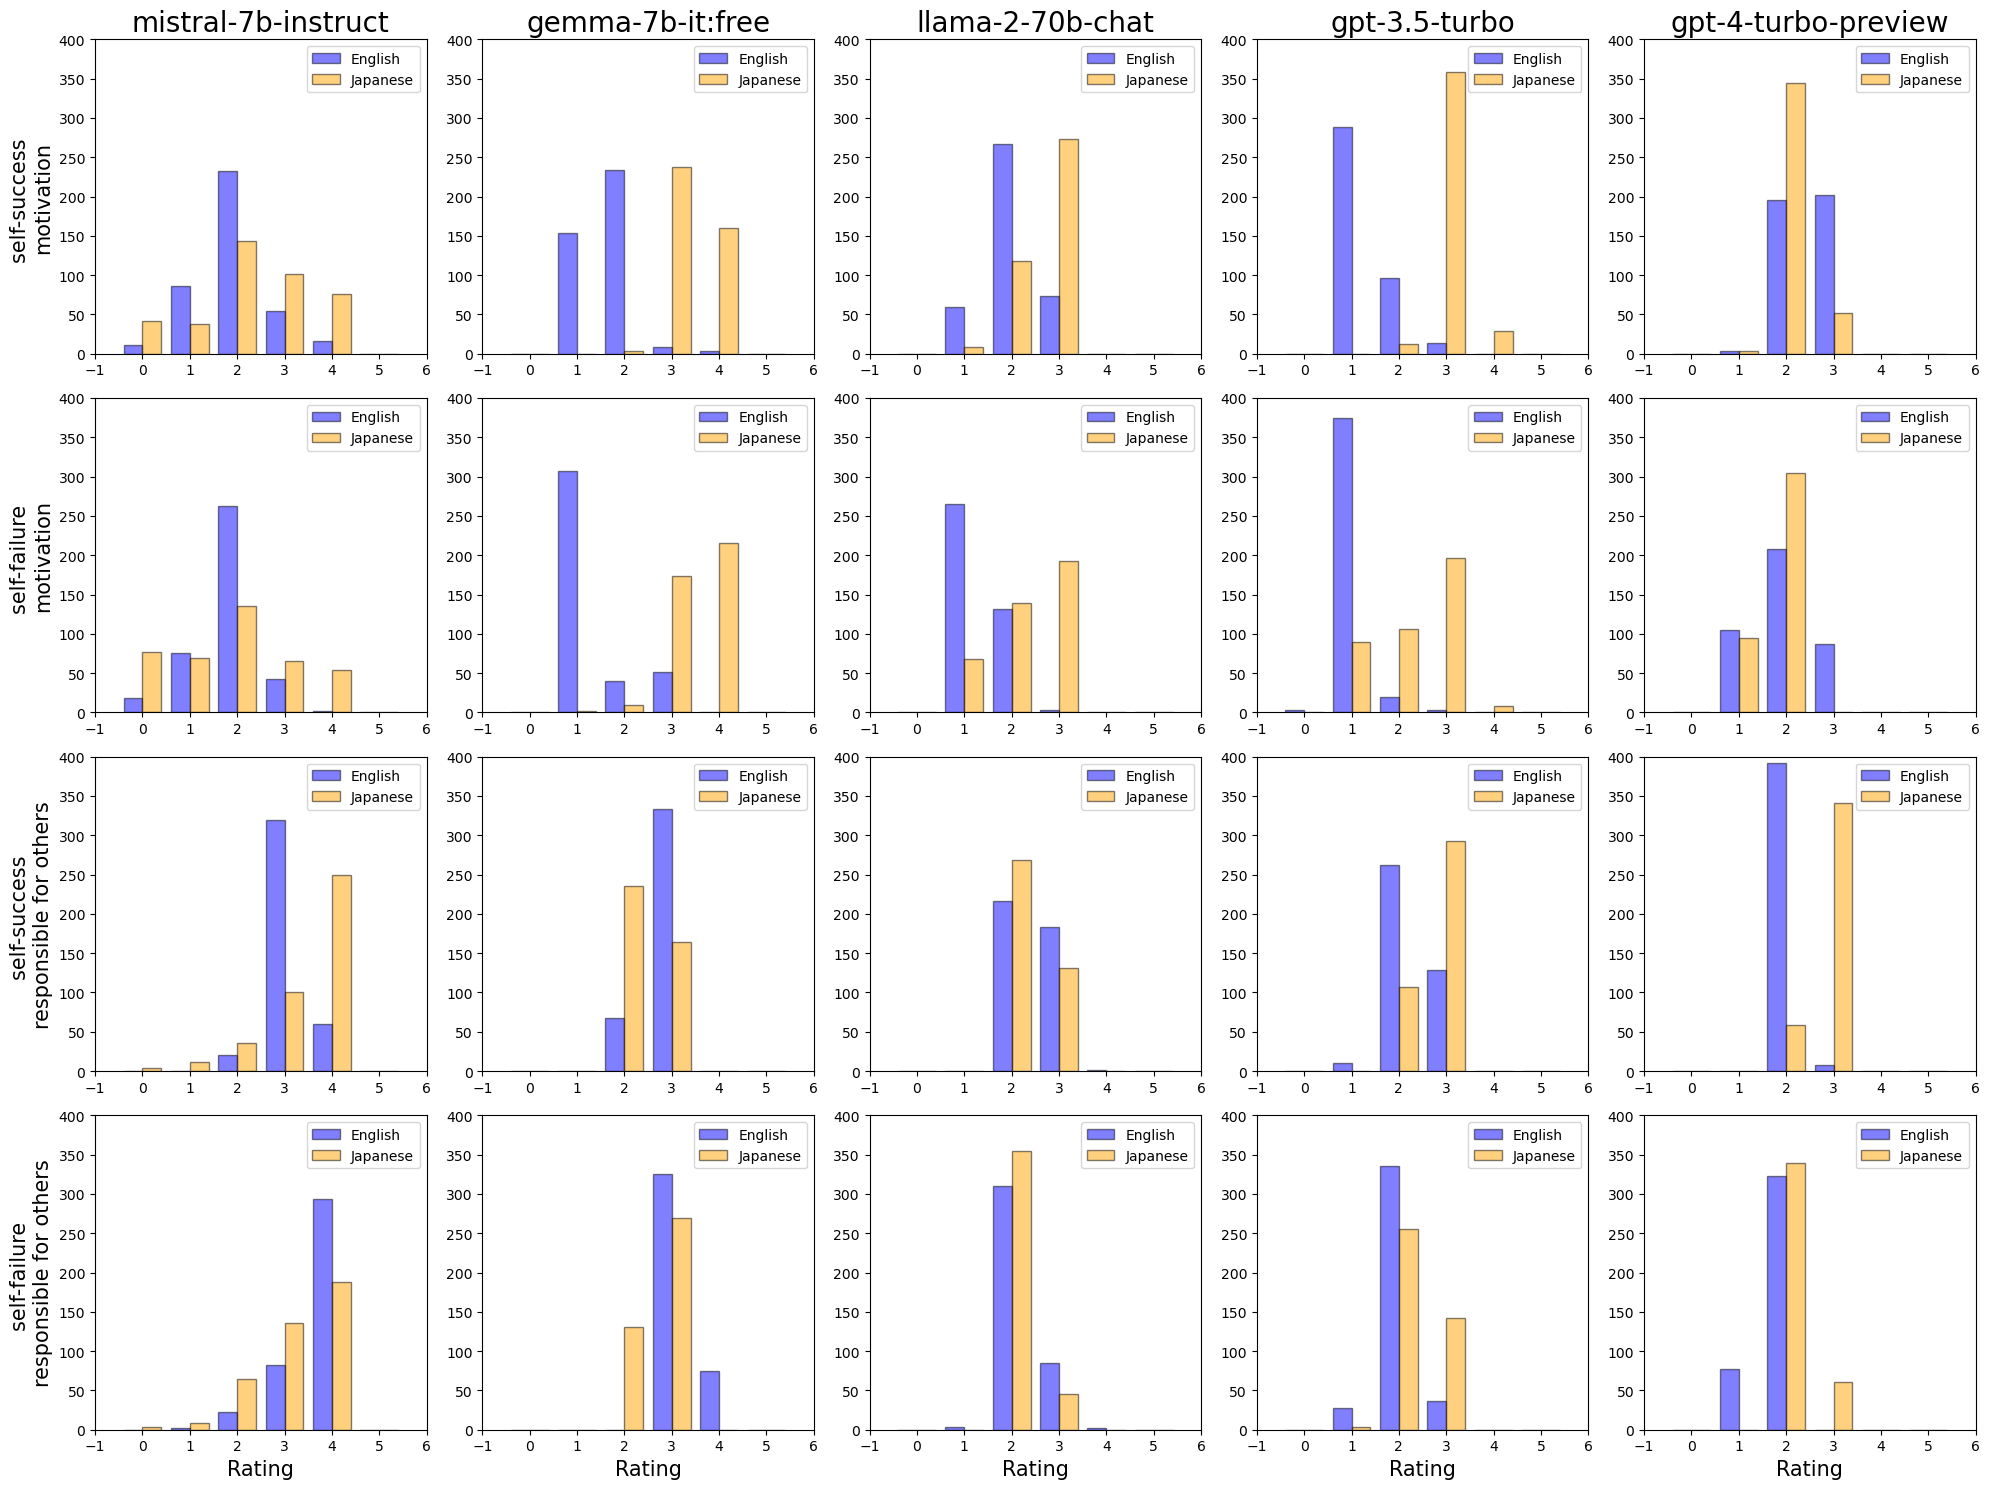

In [103]:
# subplots
import matplotlib.pyplot as plt
from collections import Counter
# examples for similarities and differences among emotions per systems
emotions = ['responsible for others', 'responsible for myself', 'motivation', 'happiness', 'fear of troubling someone else', 'positive', 'negative']
systems = ["mistral-7b-instruct", "gemma-7b-it:free", "llama-2-70b-chat", "gpt-3.5-turbo", "gpt-4-turbo-preview"]
status = "self-success"
#status = "self-failure"
fig, axs = plt.subplots(4, 5, figsize=(20, 15))  # Adjust figsize as needed

e_dict = {"self-success": ['motivation', 'responsible for others'], "self-failure": ['motivation', 'responsible for others']}
e_dict = {"motivation": ["self-success","self-failure"], 'responsible for others': ["self-success","self-failure"] }

#e_dict = {"self-success": ['motivation', 'responsible for others'], "self-failure": ['motivation', 'responsible for others', 'responsible for myself']}
j = 0
for emotion in e_dict.keys():
  for status in e_dict[emotion]:
    
    for i, system in enumerate(systems):

      df_system_en = df_us[df_us['system']==system]
      df_system_jp = df_jp[df_jp['system']==system]

      one_situation_en = df_system_en[df_system_en['status']==status]
      one_situation_jp = df_system_jp[df_system_jp['status']==status]
      # pick values for situation 1
      val_1 = one_situation_en[emotion].values
      val_1_int = val_1.astype(int)
      # pick values for situation 2
      val_2 = one_situation_jp[emotion].values
      val_2_int = val_2.astype(int)
      # Define bin edges to center bars around integers
      bin_edges = [j + 0.5 for j in range(-1, 6)]

      # Plot double histogram
      axs[j,i].hist([val_1, val_2], bins=bin_edges, color=['blue', 'orange'], alpha=0.5, label=['English', 'Japanese'], align='mid', edgecolor='black')

      # Add labels and title
      axs[j,i].set_xlim([-1,6])
      axs[j,i].set_ylim([0,400])
      if j==3:
        axs[j,i].set_xlabel('Rating', fontsize=15)
      if i==0:
        axs[j,i].set_ylabel(status + " \n"+ emotion, fontsize=15)
      if j==0:
        axs[j,i].set_title(systems[i],size=20)
      axs[j,i].legend()
    j+=1
  # Adjust layout
plt.tight_layout()
plt.savefig("results/raw_distributions.pdf", format='pdf')
  # Show plot
#plt.show()